## Lab Exercise 2
### Loading the dataset

In [42]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
data=fetch_california_housing()
target=data.target
data=pd.DataFrame(data.data,columns=data.feature_names)
data['Target']=target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Data Preprocessing

In [14]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [15]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


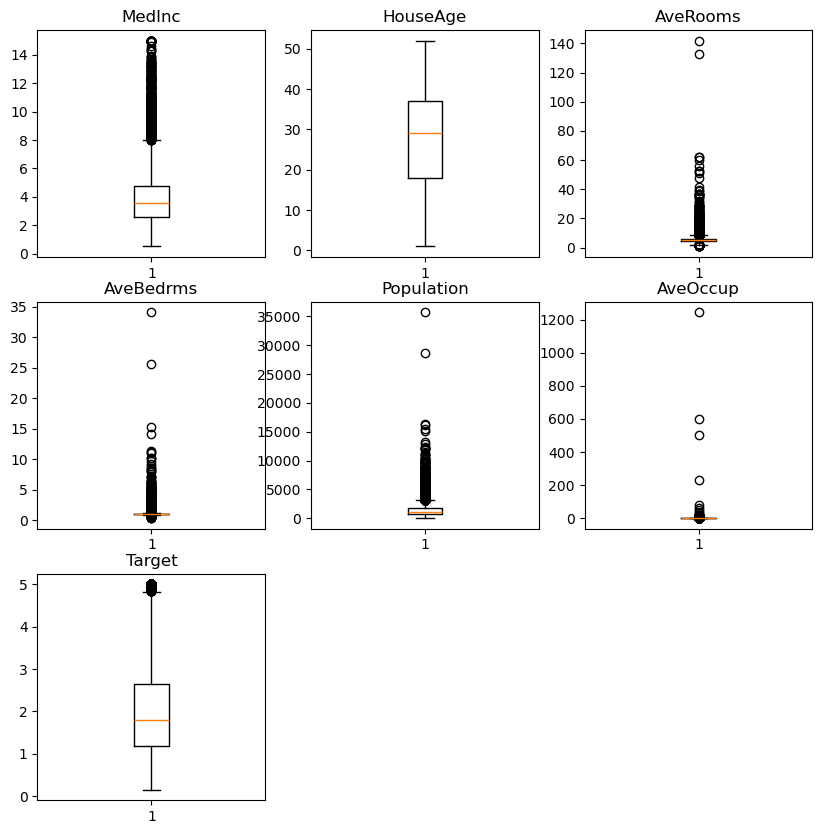

In [43]:
data=data.drop(columns=['Latitude','Longitude'])
import matplotlib.pyplot as plt
f =  plt.figure(figsize=(10,10))
for i,j in enumerate(data.columns):
    f.add_subplot(3,3,i+1)
    plt.boxplot(data[j])
    plt.title(j)

In [44]:
import numpy as np
from scipy import stats
def drop_outlier(data,col_name):
  z = np.abs(stats.zscore(data[col_name]))
  data.drop(data.index[np.where(abs(z)>2.5)],inplace=True)
  print("New data shape post deletion of outliers from ",col_name,": "+str(data.shape))
for i in data.columns:
    drop_outlier(data,i)

New data shape post deletion of outliers from  MedInc : (20163, 7)
New data shape post deletion of outliers from  HouseAge : (20163, 7)
New data shape post deletion of outliers from  AveRooms : (20012, 7)
New data shape post deletion of outliers from  AveBedrms : (19519, 7)
New data shape post deletion of outliers from  Population : (19035, 7)
New data shape post deletion of outliers from  AveOccup : (19025, 7)
New data shape post deletion of outliers from  Target : (18323, 7)


In [46]:
for i in data.columns:
    data[i]=(data[i]-data[i].mean())/data[i].std()
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target
0,3.149237,0.976349,1.662012,-0.366660,-1.339673,-0.504404,2.782415
1,3.133242,-0.649029,0.986023,-1.000549,1.380305,-1.072900,1.782381
2,2.431599,1.870307,2.843658,0.239248,-1.112027,-0.189739,1.714366
3,1.346673,1.870307,0.604722,0.234525,-1.030911,-0.514111,1.599591
4,0.139027,1.870307,1.025637,0.332444,-1.021753,-0.981544,1.609155


### Exploratory Data Analysis:

In [49]:
data.corr().iloc[:,-1]

MedInc        0.640518
HouseAge      0.069968
AveRooms      0.268868
AveBedrms    -0.105445
Population    0.003507
AveOccup     -0.257563
Target        1.000000
Name: Target, dtype: float64

<Axes: >

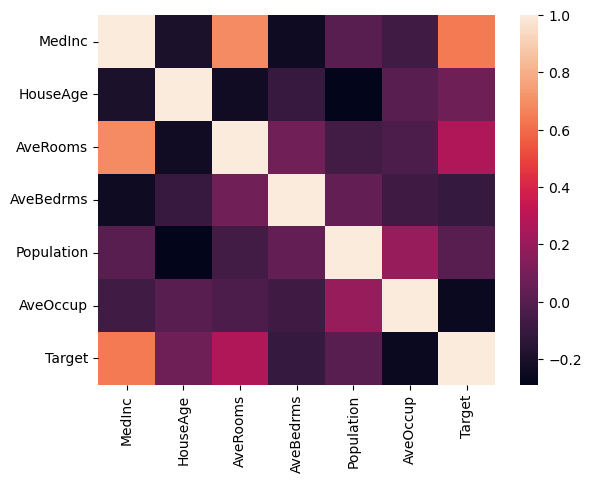

In [70]:
import seaborn as sns
sns.heatmap(data.corr())

### Model Building

In [68]:
X = data.drop(columns='Target', axis=1)
Y = data['Target']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [71]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
model=LinearRegression()
model.fit(X_train,Y_train)
lasso_parameters={'alpha':[0.1,0.5,1,5,10]}
lasso=Lasso()
model1=GridSearchCV(lasso, lasso_parameters, scoring='neg_mean_squared_error',cv=5)
model1.fit(X_train,Y_train)
ridge_parameters={'alpha':[1,5,10,15,20]}
ridge=Ridge()
model2=GridSearchCV(ridge, ridge_parameters, scoring='neg_mean_squared_error',cv=5)
model2.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [1, 5, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [72]:
print("Best parameter of Lasso:",model1.best_estimator_)
print("Best parameter of Ridge:",model2.best_estimator_)

Best parameter of Lasso: Lasso(alpha=0.1)
Best parameter of Ridge: Ridge(alpha=1)


### Model Evaluation

In [73]:
from sklearn.metrics import mean_absolute_error as mae
X_test_prediction = model.predict(X_test)
maerror=mae(Y_test, X_test_prediction)
X_test_prediction1 = model1.predict(X_test)
maerror1=mae(Y_test, X_test_prediction1)
X_test_prediction2 = model2.predict(X_test)
maerror2=mae(Y_test, X_test_prediction2)
print("Mean Absolute Error for MLR: ",maerror)
print("Mean Absolute Error for Lasso: ",maerror1)
print("Mean Absolute Error for Ridge: ",maerror2)

Mean Absolute Error for MLR:  0.4942070320676183
Mean Absolute Error for Lasso:  0.5646823035112286
Mean Absolute Error for Ridge:  0.4942140600613207


In [74]:
from sklearn.metrics import mean_squared_error as mse
import math
mserror=mse(Y_test,X_test_prediction)
rmserror=np.sqrt(mserror)
mserror1=mse(Y_test,X_test_prediction1)
rmserror1=np.sqrt(mserror1)
mserror2=mse(Y_test,X_test_prediction2)
rmserror2=np.sqrt(mserror2)
print("Root Mean Squared Error for MLR: ",rmserror)
print("Root Mean Squared Error for Lasso: ",rmserror1)
print("Root Mean Squared Error for Ridge: ",rmserror2)

Root Mean Squared Error for MLR:  0.6459774856136384
Root Mean Squared Error for Lasso:  0.7251377058099271
Root Mean Squared Error for Ridge:  0.6459801863381689


In [75]:
from sklearn.metrics import r2_score as r2s
r2score=r2s(Y_test,X_test_prediction)
r2score1=r2s(Y_test,X_test_prediction1)
r2score2=r2s(Y_test,X_test_prediction2)
print("R-squared (R²) score for MLR: ",r2score)
print("R-squared (R²) score for Lasso: ",r2score1)
print("R-squared (R²) score for Ridge: ",r2score2)

R-squared (R²) score for MLR:  0.5726602504806135
R-squared (R²) score for Lasso:  0.46150769190881913
R-squared (R²) score for Ridge:  0.5726566772001737


## End